Изучаем сам датасет

# preprocessing


In [2]:
!pip install hanziconv

     |████████████████████████████████| 286kB 3.8MB/s 
  Created wheel for hanziconv: filename=hanziconv-0.3.2-py2.py3-none-any.whl size=23215 sha256=ead79a2d11947d80afd514bccd87aafe300c06a96a31f675c5532c52608d452e
  Stored in directory: /root/.cache/pip/wheels/03/d8/3c/c39898fa9c9ce6e34b0ab4c6604892462d440c743715c94054
Successfully built hanziconv


Simplifying characters for the Takata dictionaries (they are given in traditional form).

In [ ]:
#import pandas as pd
#from hanziconv import HanziConv

#df_A = pd.read_csv('tak_A.csv', delimiter='\t') 
#df_A['simplified'] = df_A.apply(lambda row: HanziConv.toSimplified(row.hanzi_trad), axis=1)
#df_B = pd.read_csv('tak_B.csv', delimiter='\t') 
#df_B['simplified'] = df_B.apply(lambda row: HanziConv.toSimplified(row.hanzi_trad), axis=1)

In [ ]:
#df_A.to_csv('tak_A_simp.csv')
#df_B.to_csv('tak_B_simp.csv')

#processing

##downloading libs and files

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import html
import urllib
import time
import re
#import textdistance
from hanziconv import HanziConv


In [4]:
df_pidg_tak_A = pd.read_csv('pidg_tak_A.csv', delimiter='\t') 
print(f'pidg_tak_A: {df_pidg_tak_A.shape[0]}')
df_pidg_tak_B = pd.read_csv('pidg_tak_B.csv', delimiter='\t') 
print(f'pidg_tak_B: {df_pidg_tak_B.shape[0]}')
df_pidg_perex = pd.read_csv('pidg_perex.csv', delimiter='\t') 
print(f'pidg_perex: {df_pidg_perex.shape[0]}')
df_mand_liu85 = pd.read_csv('mand_liu85.csv', delimiter='\t') 
print(f'mand_liu85: {df_mand_liu85.shape[0]}')
df_mand_cen90 = pd.read_csv('mand_cen90.csv', delimiter='\t') 
print(f'mand_cen90: {df_mand_cen90.shape[0]}')
df_mand_wikip = pd.read_csv('mand_wikip.csv', delimiter='\t') 
print(f'mand_wikip: {df_mand_wikip.shape[0]}')

pidg_tak_A: 2143
pidg_tak_B: 1090
pidg_perex: 593
mand_liu85: 388
mand_cen90: 143
mand_wikip: 1460


# Part I. lexical overlapping

## Section I.I. "raw" Russian lexemes (items within the dataset)

Doing it on examples:

In [ ]:
set(df_mand_cen90.rus_translation)

In [ ]:
len(set(df_pidg_tak_B.rus_translation).intersection(set(df_mand_wikip.rus_translation)))

0

In [ ]:
set(df_mand_liu85.rus_translation).intersection(set(df_pidg_perex.rus_translation))

{'водка',
 'господин',
 'колхоз',
 'копейка',
 'машина',
 'печь',
 'рубль',
 'союз',
 'тайга',
 'халат',
 'хлеб',
 'хорошо'}

In [ ]:
set(df_mand_liu85.rus_translation).intersection(set(df_mand_cen90.rus_translation))

{'ГПУ',
 'КГБ',
 'Кремль',
 'ЧК',
 'аршин',
 'балалайка',
 'берковец',
 'большевик',
 'водка',
 'копейка',
 'крикун',
 'меньшевик',
 'молокане',
 'платье',
 'пуд',
 'рубль',
 'семинар',
 'совет',
 'союз',
 'царь'}

Doing it for all the pairs of the sources:

In [ ]:
idx_to_name = {
    0: 'pidg_tak_A', 
    1: 'pidg_tak_B', 
    2: 'pidg_perex', 
    3: 'mand_cen90', 
    4: 'mand_liu85',
    5: 'mand_wikip'
}

list_of_df = [df_pidg_tak_A, df_pidg_tak_B, df_pidg_perex, df_mand_cen90, df_mand_liu85, df_mand_wikip]


In [ ]:
for i in range(6):
    print(i)

0
1
2
3
4
5


In [ ]:
def overlap_collector(list_1, list_2, filename):
    overlap_list = list_1.intersection(list_2)
    overlap_count = len(overlap_list)
    with open(filename, 'w', encoding='utf-8') as f:
        for w in overlap_list:
            f.write(w+'\r\n')
    return overlap_count

In [ ]:
raw_rus_overlap = []
for i in range(6):
    raw = []
    for j in range(6):
        filename = idx_to_name[i]+' & '+idx_to_name[j]+'.txt'
        current_overlap = overlap_collector(set(list_of_df[i].rus_translation), set(list_of_df[j].rus_translation), filename)
        raw.append(current_overlap)
    raw_rus_overlap.append(raw)


In [ ]:

df_rus_overlap = pd.DataFrame(raw_rus_overlap, columns=idx_to_name.values(), index=idx_to_name.values())
df_rus_overlap

,pidg_tak_A,pidg_tak_B,pidg_perex,mand_cen90,mand_liu85,mand_wikip
pidg_tak_A,2108,499,87,2,9,0
pidg_tak_B,499,1074,57,0,2,0
pidg_perex,87,57,588,4,12,0
mand_cen90,2,0,4,133,20,20
mand_liu85,9,2,12,20,385,0
mand_wikip,0,0,0,20,0,1433


In [ ]:
a = eval(df_mand_liu85)
a

TypeError: ignored

In [ ]:
list_of_df = [df_pidg_tak_A, df_pidg_tak_B, df_pidg_perex, df_mand_cen90, df_mand_liu85, df_mand_wikip]

raw_rus_overlap = []
for el in list_of_df: 
    raw = []
    for comp_el in list_of_df:
        overlap = len(set(el.rus_translation).intersection(set(comp_el.rus_translation)))
        raw.append(overlap)
    raw_rus_overlap.append(raw)


In [ ]:
raw_rus_overlap

[[2108, 499, 87, 2, 9, 0],
 [499, 1074, 57, 0, 2, 0],
 [87, 57, 588, 4, 12, 0],
 [2, 0, 4, 133, 20, 20],
 [9, 2, 12, 20, 385, 0],
 [0, 0, 0, 20, 0, 1433]]

In [ ]:
names_list_of_df = ['df_pidg_tak_A', 'df_pidg_tak_B', 'df_pidg_perex', 'df_mand_cen90', 'df_mand_liu85', 'df_mand_wikip']

df = pd.DataFrame(raw_rus_overlap, columns=names_list_of_df, index=names_list_of_df)


In [ ]:
df

NameError: ignored

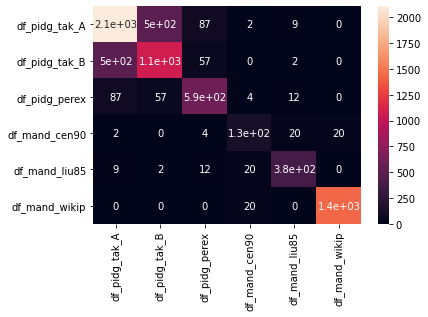

In [ ]:
import seaborn as sns

sns.heatmap(df, annot=True)


### Drawing Venn Diagrams

In [ ]:
!pip install matplotlib_venn

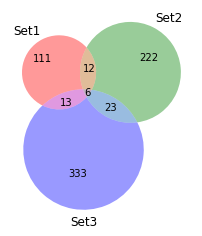

In [ ]:
#https://github.com/konstantint/matplotlib-venn
from matplotlib_venn import venn3
venn3(subsets = (111, 222, 12, 333, 13, 23, 6), set_labels = ('Set1', 'Set2', 'Set3'))

Vocabulary overlap in pidgin dictionaries

In [ ]:
len_tak_A, len_tak_B, len_perex = len(set(df_pidg_tak_A.rus_translation)), len(set(df_pidg_tak_B.rus_translation)), len(set(df_pidg_perex.rus_translation))
overlap_tak_A_tak_B = len(set(df_pidg_tak_A.rus_translation).intersection(set(df_pidg_tak_B.rus_translation)))
overlap_tak_A_perex = len(set(df_pidg_tak_A.rus_translation).intersection(set(df_pidg_perex.rus_translation)))
overlap_tak_B_perex = len(set(df_pidg_tak_B.rus_translation).intersection(set(df_pidg_perex.rus_translation)))
overlap_tak_A_tak_B_perex = len(set.intersection(set(df_pidg_tak_A.rus_translation), set(df_pidg_tak_B.rus_translation), set(df_pidg_perex.rus_translation)))

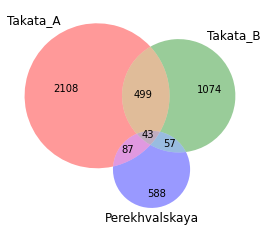

In [ ]:
venn3(subsets = (len_tak_A, len_tak_B, overlap_tak_A_tak_B, len_perex, overlap_tak_A_perex, overlap_tak_B_perex, overlap_tak_A_tak_B_perex), set_labels = ('Takata_A', 'Takata_B', 'Perekhvalskaya'))

Vocabulary overlap in putonghua dictionaries

In [ ]:
len_liu85, len_cen90, len_wikip = len(set(df_mand_liu85.rus_translation)), len(set(df_mand_cen90.rus_translation)), len(set(df_mand_wikip.rus_translation))
overlap_liu85_cen90 = len(set(df_mand_liu85.rus_translation).intersection(set(df_mand_cen90.rus_translation)))
overlap_liu85_wikip = len(set(df_mand_liu85.rus_translation).intersection(set(df_mand_wikip.rus_translation)))
overlap_cen90_wikip = len(set(df_mand_cen90.rus_translation).intersection(set(df_mand_wikip.rus_translation)))
overlap_liu85_cen90_wikip = len(set.intersection(set(df_mand_liu85.rus_translation), set(df_mand_cen90.rus_translation), set(df_mand_wikip.rus_translation)))

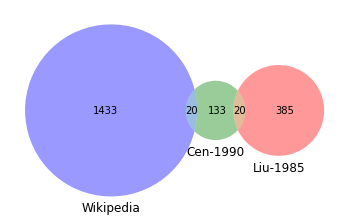

In [ ]:
venn3(subsets = (len_liu85, len_cen90, overlap_liu85_cen90, len_wikip, overlap_liu85_wikip, overlap_cen90_wikip, overlap_liu85_cen90_wikip), set_labels = ('Liu-1985', 'Cen-1990', 'Wikipedia'))

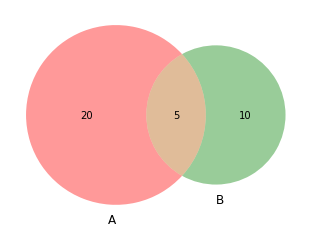

In [ ]:
from matplotlib_venn import venn2
venn2(subsets = (20, 10, 5))

In [ ]:
intersect = set.intersection(overall_pidgin, overall_mandarin)
for i in intersect:
  print(i)

печь
грош
хорошо
водка
рубль
аршин
шапка
халат
вершок
гусли
копейка
господин
самовар
машина
колхоз
союз
тайга
хлеб


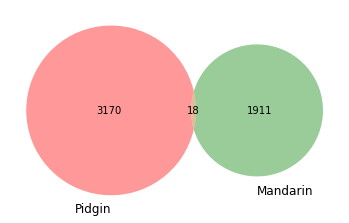

In [ ]:
overall_pidgin = set(df_pidg_tak_A.rus_translation) | set(df_pidg_tak_B.rus_translation) | set(df_pidg_perex.rus_translation)
overall_mandarin = set(df_mand_liu85.rus_translation) | set(df_mand_cen90.rus_translation) | set(df_mand_wikip.rus_translation)

venn2(subsets = (len(overall_pidgin), len(overall_mandarin), len(set.intersection(overall_pidgin, overall_mandarin))), set_labels= ('Pidgin', 'Mandarin'))

## Section I.II. Russian lexemes (substring search in takata)

In [ ]:
def substring_search(ult_template, string):
#    template = template.encode('unicode_escape').decode('ascii')
#    string = string.encode('unicode_escape').decode('ascii')
    #template = '[^ \(\[]' + template + '[$ \)\]]'
    template = '[ \(\[/]' + ult_template + '[ \)\]/]'
    #print(template)
    result = re.findall(template, string)
    #print('b')
    if result != []:
        return ult_template
#        result = result.group()
    else:
        return ''
    #print('c')
    #return result

In [ ]:
substring_search(r'abc', r'/ def abc ')

[ \(\[/]abc[ \)\]/]


'abc'

In [ ]:
set_pidg = set(df_pidg_tak_A.rus_translation)
set_mand = set(df_pidg_perex.rus_translation)

In [ ]:
overlaps = set()
for id, i in enumerate(set_pidg):
    for j in set_mand:
        i = ' ' + i + ' '
        j = re.sub('\(.*?\)', '', j)
        overlap = substring_search(j, i)
        if overlap != '':
            overlaps.add(overlap)
    if id % 10 == 0: print(id)

In [ ]:
len(overlaps)

239

In [ ]:
len(overlaps)
with open('tak_A+perex_overlap.txt', 'a', encoding='utf-8') as f:
    for o in overlaps:
        f.write(o+'\r\n')

In [ ]:
list_tak_A = list(df_pidg_tak_A.rus_translation)
list_tak_B = list(df_pidg_tak_B.rus_translation)
str_tak_A, str_tak_B = ' '.join(list_tak_A), ' '.join(list_tak_B)

str_tak_A = re.sub('[\(\)\[\]/]', '', str_tak_A)
str_tak_B = re.sub('[\(\)\[\]/]', '', str_tak_B)

set_tak_A = set(str_tak_A.split(' '))
set_tak_B = set(str_tak_B.split(' '))


In [ ]:
len(set_tak_A), len(set_tak_B)

(3495, 1774)

In [ ]:
len(set.intersection(set_tak_A, set_tak_B, set(df_pidg_perex.rus_translation)))

145

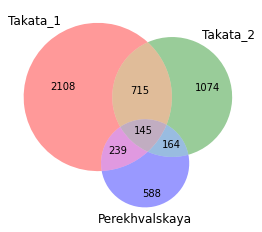

In [ ]:
venn3(subsets = (len_tak_A, len_tak_B, 715, len_perex, 239, 164, 145), set_labels = ('Takata_1', 'Takata_2', 'Perekhvalskaya'))

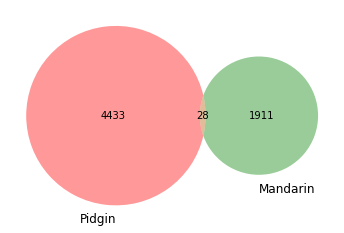

In [ ]:
fuzzy_overall_pidgin = set_tak_A | set_tak_B | set(df_pidg_perex.rus_translation)
overall_mandarin = set(df_mand_liu85.rus_translation) | set(df_mand_cen90.rus_translation) | set(df_mand_wikip.rus_translation)

venn2(subsets = (len(fuzzy_overall_pidgin), len(overall_mandarin), len(set.intersection(fuzzy_overall_pidgin, overall_mandarin))), set_labels= ('Pidgin', 'Mandarin'))

## Section I.III. Mandarin lexemes

In [ ]:
list_of_df = [df_pidg_tak_A, df_pidg_tak_B, df_pidg_perex, df_mand_cen90, df_mand_liu85, df_mand_wikip]

raw_zho_overlap = []
for el in list_of_df: 
    raw = []
    for comp_el in list_of_df:
        overlap = len(set(el.hanzi_simp).intersection(set(comp_el.hanzi_simp)))
        raw.append(overlap)
    raw_zho_overlap.append(raw)


In [ ]:
raw_zho_overlap

[[2086, 221, 0, 0, 0, 0],
 [221, 1059, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 143, 16, 17],
 [0, 0, 0, 16, 388, 3],
 [0, 0, 0, 17, 3, 1256]]

In [ ]:
names_list_of_df = ['df_pidg_tak_A', 'df_pidg_tak_B', 'df_pidg_perex', 'df_mand_cen90', 'df_mand_liu85', 'df_mand_wikip']

df = pd.DataFrame(raw_zho_overlap, columns=names_list_of_df, index=names_list_of_df)
df

,df_pidg_tak_A,df_pidg_tak_B,df_pidg_perex,df_mand_cen90,df_mand_liu85,df_mand_wikip
df_pidg_tak_A,2086,221,0,0,0,0
df_pidg_tak_B,221,1059,0,0,0,0
df_pidg_perex,0,0,1,0,0,0
df_mand_cen90,0,0,0,143,16,17
df_mand_liu85,0,0,0,16,388,3
df_mand_wikip,0,0,0,17,3,1256


In [ ]:
set(df_pidg_tak_A.hanzi_simp).intersection(set(df_pidg_tak_B.hanzi_simp))

{'[пропуск в тексте]',
 '七令个外',
 '七令面子',
 '七料伏坎',
 '三达子',
 '不两子',
 '不两弟子',
 '不何地',
 '不利史内',
 '不利沙的',
 '不利的',
 '不力世外',
 '不力池',
 '不各拉西',
 '不地牙池',
 '不少',
 '不未西',
 '不流合',
 '不流泥',
 '不浪的',
 '不牙此',
 '不罗史',
 '不罗史代才',
 '不罗史唐',
 '不罗尾',
 '不罗牙史泥郞',
 '不罗认泥牙',
 '不路的',
 '个什坎',
 '个力坎',
 '五路史坎',
 '亚力外尺劳未可',
 '交什外',
 '什纳',
 '仝',
 '令史坎',
 '以命泥',
 '伏烂坎',
 '佃尾儿',
 '佃未力',
 '何家言',
 '俊门内',
 '俏而头夜毛池',
 '借史淂',
 '冻史坎',
 '几明亮',
 '几毛',
 '则不利沙的',
 '则伏独儿',
 '则伏笑',
 '则利什坎',
 '则利池什内勿罗代',
 '则布拉',
 '别力命泥',
 '到马',
 '力吓',
 '力吓儿史徒',
 '力干史坎',
 '勿史道克',
 '勿罗代',
 '勿达哦罗史利拉史',
 '卧昔',
 '又不什坎',
 '叉时',
 '变求',
 '变连子',
 '古令内',
 '古变',
 '叫什',
 '史劳旺',
 '史勿牙各',
 '史勿牙成',
 '史各定内',
 '史大利',
 '史拉的坎',
 '史故史内',
 '史都利了',
 '史面什内',
 '各两地',
 '各则坎',
 '各利什年外',
 '各力气',
 '各布史',
 '各拉史内',
 '各拉史内变连子',
 '各拉史内里细子',
 '各泥各才',
 '各浪史内定',
 '各盖外',
 '各门地儿',
 '合劳史代',
 '吓迷',
 '吔力各地儿',
 '吾必染',
 '哈几牙史坎',
 '哦不浪坎',
 '哦史波定',
 '哦各信旺儿',
 '哦笑的儿',
 '哦罗史泥子',
 '哦罗地子',
 '哦罗棒子',
 '哦罗淂',
 '哦罗色垻坎',
 '哦罗面子',
 '哦贝池',
 '地各凹',
 '夜史',
 '大克',
 '大门',
 '妙达',
 '嫁的',
 '射岳',
 '少各利',
 '巴不力史',

# Part II. morpho- and phonological features

## 1. Употребление аффрикат вместо русских [з], [з’] [ж] (фонетический)

In [ ]:
#проверяем звонкие щелевые
def subsetting_voiced_fric(voiced_fric, df_, exclude_brackets=False):
    #after = r'[аоуыэяёюиерйлмнв]'
    #after = r'[аоуыэрлмнв]'
    after = r'[яёюией]'
    if exclude_brackets:
        string = r'(?<![\(\[])'+voiced_fric+after
        #жа r'[^\[\(].*?'+
    else:
        string = voiced_fric+after
    #string = r'[^\[\(]'+voiced_fric+after
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset = df_[df_['rus_translation'].str.contains(string)]
    #subset_2 = subset_1 #надо как-то довертеть, чтоб не учитывать содержание в скобках
    return subset

In [ ]:
df_pidg_tak_A.head()

,hanzi_trad,hanzi_simp,pinyin,transcr,transc_rus,rus_translation,note,chinese_translation
0,哦定,哦定,NONE,γɤ-tiŋ,один,один,NaN,A:02a-02 壹
1,獨凹,独凹,NONE,tuə -va ʔ,дува,два,NaN,A:02a-02 貳
2,的利,的利,NONE,tiə -li ʔ,дили,три,NaN,A:02a-02 叄
3,俏的利,俏的利,NONE,ʨ‘iau-tiə -li ʔ,цяодили,четыре,NaN,A:02a-02 肆
4,癟地,瘪地,NONE,pie-ti,беди,пять,NaN,A:02a-02 伍


In [ ]:
subsetting_voiced_fric(r'з', df_pidg_perex, exclude_brackets=True)#.shape

,hanzi_trad,hanzi_simp,pinyin,transcr,transc_rus,rus_translation,note,chinese_translation
20,NONE,NONE,NONE,bulədóƷilə,NONE,бульдозер,NaN,NONE
151,NONE,NONE,NONE,Ʒil'ónə,NONE,зелёный,NaN,NONE
152,NONE,NONE,NONE,Ʒiml'á,NONE,земля,NaN,NONE
153,NONE,NONE,NONE,Ʒimá,NONE,зима,NaN,NONE
154,NONE,NONE,NONE,Ʒimój,NONE,зимой,NaN,NONE
229,NONE,NONE,NONE,láƷi,NONE,лази,NaN,NONE
248,NONE,NONE,NONE,magazínə maaƷínə,NONE,магазин,NaN,NONE
305,NONE,NONE,NONE,niƷ'á,NONE,нельзя,NaN,NONE
524,NONE,NONE,NONE,uaƷílə,NONE,увозила,NaN,NONE
547,NONE,NONE,NONE,xaƷáinə,NONE,хозяин,NaN,NONE


## 2. Употребление неогубленного гласного [ɤ] вместо русского [о] после заднеязычных согласных (фонетический)

In [ ]:
def subsetting_velar_labialized(velar, df_):
    after = r'[о]'
    string = velar+after
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset = df_[df_['rus_translation'].str.contains(string)]
    return subset

In [ ]:
subsetting_velar_labialized(r'[гкх]', df_mand_wikip).shape

(176, 8)

## 3. Вставка суффикса -дза/дзы (этимол. 子, [цзы]) в существительных с основой на зубные согласные (морфологический)

In [11]:
def subsetting_zi(zi, df_):
    after = '(/|$)'
    string = zi+after
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset = df_[df_['hanzi_simp'].str.contains(string)]
    return subset

In [18]:
subsetting_zi(r'之', df_mand_liu85)#.shape


/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,hanzi_trad,hanzi_simp,pinyin,transcr,transc_rus,rus_translation,note,chinese_translation


## 4. Протеза [ɤ] перед [р] в абсолютном начале русского слова (фонетический)





In [19]:
#[дтц]ь?
def subsetting_r(df_):
    before = r'(\A| )'
    string = before+r'[рР]'
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset_1 = df_[df_['rus_translation'].str.contains(string)]
    return subset_1

In [28]:
subsetting_r(df_pidg_tak_A)#.shape


/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,hanzi_trad,hanzi_simp,pinyin,transcr,transc_rus,rus_translation,note,chinese_translation
27,史唐樓不利,史唐楼不利,NONE,sɿ-t‘ɐ ləu-pəʔ-li,сыта лоубэли,сто рублей,NaN,A:02b-03 壹伯
62,哦羅之外,哦罗之外,NONE,γɤ-luɤ-tsɿ-vai,олоцзывай,розовый,NaN,A:03b-04 水紅
81,池銀內,池银内,NONE,ts‘ɿ-iŋ-nuei,цыиннуй,чиинный (цвет брюха рыбы),NaN,A:04a-05 魚白
115,卜蘭則外,卜兰则外,NONE,pəʔ-læ̃-tsəʔ-vai,бэлэцзэвай,розовый,NaN,A:05b-01 妃色
181,吔力史個伏,吔力史个伏,NONE,ie-liə -sɿ-kɤ-fə ʔ,елисыгофэ,резковь (разновидность мягкой ткани),NaN,A:08a-01 ʔ張絨
...,...,...,...,...,...,...,...,...
2040,各煉史,各炼史,NONE,kəʔ-lie-sɿ,гэлесы,глядь (показывать рукой),NaN,A:64a-01 手指着
2051,襍做力/ 吓的力,襍做力/ 吓的力,NONE,xa-tiəʔ-liəʔ,хадили,ходили (делать грубую работу),NaN,A:64a-04 作麽力
2070,五堯(吊)吔煉不達未,五尧(吊)吔炼不达未,NONE,u-tiau ie-lie-pəʔ taʔ-vei,удяо елебэ давэй,удить рыбу давай (удить рыбу),NaN,A:65a-01 吊(釣)魚了
2092,路垻泥,路垻泥,NONE,ləu-pa-ni,лоубани,рубани (вкусно),NaN,A:65b-03 好吃


In [ ]:
def subsetting_prosthetic_e(df_):
    before = r'(\A| |/)'
    string = before+r'哦'
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset_1 = df_[df_['hanzi_trad'].str.contains(string)]
    return subset_1

In [24]:
subsetting_prosthetic_e(df_pidg_perex)#.shape


NameError: ignored

## 5. трансформация звука [ш] в звук [s] (фонетический)

In [45]:
def subsetting_sh(sh, df_):
    #after = r'[о]'
    #string = velar+after
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset_1 = df_[df_['rus_translation'].str.contains(sh)]
    return subset_1

In [46]:
subsetting_sh(r'ш', df_pidg_tak_A)#.shape

,hanzi_trad,hanzi_simp,pinyin,transcr,transc_rus,rus_translation,note,chinese_translation
5,射史,射史,NONE,sɤ-sɿ,сосы,шесть,NaN,A:02a-02 陸
15,謝史那此地,谢史那此地,NONE,ɕie-sɿ-na-ts‘ɿ-ti,сесынацыди,шестнадцать,NaN,A:02a-05 拾陸
23,射史下地,射史下地,NONE,sɤ-sɿ-ɕia-ti,сосысяди,шестьдесят,NaN,A:02b-02 陸拾
34,貳個 各浪什,贰个 各浪什,NONE,kəʔ-lɐ-səʔ,гэласэ,грош,NaN,A:02b-04
39,補路什坎,补路什坎,NONE,pu-ləu-sə -k‘æ̃ ʔ,булоусэкэ,полушка,NaN,A:02b-05 一路路
...,...,...,...,...,...,...,...,...
2118,不哥力不力少,不哥力不力少,NONE,pə -kɤ-liə pə -liə -sau,бэголи бэлисао,поколи пришёл (заходи),NaN,A:66b-02 哈來罷
2119,刀不力染力,刀不力染力,NONE,tau-pə -liə -zæ̃-liəʔ ʔ ʔ,даобэли-зэли,добри-жали (хороший),NaN,A:66b-02 好哈
2129,必史各怪/念朝旺,必史各怪/念朝旺,NONE,piə -sɿ kəʔʔ-kuai / nie-ts‘au-vɐ,бисы гэгуай / нецаова,ишь какой / нечего (не торопись),NaN,A:67a-01 不是塊(快)甚
2135,何地布地念布地,何地布地念布地,NONE,xɤ-ti pu-ti-nie pu-ti,ходи буди не буди,ходи буди не буди (пойдёшь или нет),NaN,A:67a-03 去不去


## 6. трансформация русского звука [к] в звук [х] (фонетический)

In [40]:
def subsetting_k_h(df_):
    #after = r'[о]'
    #string = velar+after
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset_1 = df_[df_['rus_translation'].str.contains('[кК]') & df_['pinyin'].str.contains('h')]
    #subset_2 = subset_1[subset_1['transcr'].str.contains('x')]
    return subset_1

In [43]:
subsetting_k_h(df_mand_wikip)#.shape

,hanzi_trad,hanzi_simp,pinyin,transcr,transc_rus,rus_translation,note,chinese_translation
30,NONE,乌沙科夫,wūshākēfū,NONE,NONE,Ушаков-,NONE,NONE
40,NONE,高尔察克,gāo’ěrchákè,NONE,NONE,Колчак-,NONE,NONE
65,NONE,布尔什维克,bùěrshíwéikè,NONE,NONE,Большевик,NONE,NONE
103,NONE,石勒喀,shílèkā,NONE,NONE,Шилка,NONE,NONE
106,NONE,堪察加,kānchájiā,NONE,NONE,Камчатка,NONE,NONE
...,...,...,...,...,...,...,...,...
1431,NONE,后贝加尔斯克,hòubèijiā’ěrsīkè,NONE,NONE,Забайкальск,NONE,NONE
1434,NONE,车尔尼雪夫斯基,chē’ěrníxuěfūsījī,NONE,NONE,Чернышевский,NONE,NONE
1451,NONE,伏龙芝,fúlóngzhī,NONE,NONE,Фрунзенский,NONE,NONE
1453,NONE,卡梅绍娃亚,kǎméishàowáyà,NONE,NONE,Камышовая,NONE,NONE


# Part III. Comparison of frequent characters

In [ ]:
char_pidg_tak_A = ''.join(list(df_pidg_tak_A.hanzi_simp))
char_pidg_tak_A = re.sub(' ','', char_pidg_tak_A)

In [ ]:
char_pidg_tak_A

'哦定独凹的利俏的利瘪地射史谢米卧谢米佃尾地佃昔地哦定那此地独凹那此地的利那此地俏的利那此地瘪地那此地谢史那此地谢米那此地卧谢米那此地佃尾那此地独凹此地的利此的桑儿哥瘪地下地射史下地谢米下地卧谢米下地佃尾那史唐史唐楼不利哨的嘛念子佃昔成佃昔地佃昔成史唐佃昔成迷力彦各必各贰个各浪什啊噔必大伏各利文定艮十坎补路什坎史唐佃席地独凹哨的独凹哨的独凹此地的利哨的的利哨的的利此地俏的利哨的俏的利哨的哨而哥瘪地史唐瘪地史唐\U0002dd27地下地射史哨的谢米史唐卧谢米史唐佃尾地哨的哦定佃昔成佃昔成独凹哨的未什年外俏儿内哈老各拉史内贲寸外西未的浪日力盖沙合儿贲垻坎哦罗之外非勿炼的外补儿各浪的力浪外日炼之洛交儿内昔力各流求古路白西银俊门内牙恆达外甲料内各儿被文内秋夏外不浪淂利绕达日力盖各费内七令木合外瘪洛池银内七令个外米令内麻令浪外巴力外俊内里冒儿内各利什年外登木池外麻念儿达凹利什内蜜儿达凹瘪地蓝ʔ袜昔令个外别哨什内哦力伏个外各未计什内古令内狄木欠勿力不流子熊错外下克此未地的利此未地别力外此未地各拉淂坎淂拉伏坎俊门内西未淂浪纳各两由七要儿的具力佃史别力硬的念别力硬淂史哥力别力硬各洛史坎卜兰则外又史到的伏坎干府悞丝又不什坎各洛泥杜儿不史大尾波儿善高难麻令坎高难失乎木的外波罗史外各力线的念儿板高难迷力命坎史的吓迷内干府巴儿合各拉淂坎反子束力命坎七令个外反子各力被各炼不坎变洛反子干犯儿个难福料儿勿善坎反子各力彦坎南京史坎少克北京史坎少克迷绕儿线力之内少克细到连搭失坎束力命坎牛木浪的干木浪子绫子茧䌷波儿善蜜(念)力少内麻令坎蜜(念)力少内袜善坎麻令坎袜善烂木史坎昔力之内烂木史坎居艮外烂木史坎大上海波儿地什谢蓝麻念儿坎大布叉木叉五路不坎居艮外变洛大布波罗少克史大面子票史的儿大布各利失坎大布不勿儿地大布号史坎七顺坎ʔ的令串桃儿个外大布清克力北京史坎大布波儿善大布麻令坎大布䌷甲子泥的坎合劳不叉贲垻坎白各吔力史个伏料内地克勿浪艮珠蓝茶白毫茶甲料内茶俏儿内茶绕达才各儿被史茶波儿独艺茶牙失坎茶ʔ半克茶纳史不外茶/桃儿个外茶各杜什坎茶各泥各才工失才不无的内才哥儿浪外才不罗史代才把各叉才昔未日才道克不林才拉各外牙什失坎各拉史内达垻坎绕达达垻坎俏儿内达垻坎吓迷叉史坎波不力各劳什坎波不力哥儿内史大利把力并史坎岳故史坎/拉史坎捎不利吓迷叉史坎捎不力扇牙坎必令问史坎布力里细子必哦独什坎细木独什坎俏儿内里细子各拉史

In [ ]:
len(char_mand_wikip)

6332

In [ ]:
from collections import Counter 
freq_pidg_tak_A = Counter(char_pidg_tak_A) 
with open('freq_pidg_tak_A.csv', 'a', encoding='utf-8') as f:
    for el in freq_pidg_tak_A.most_common(154):
        f.write(el[0]+'\t'+str(el[1])+'\r\n')

In [ ]:
freq_pidg_tak_A

Counter({'(': 35,
         ')': 35,
         '/': 207,
         '[': 4,
         ']': 4,
         'ʔ': 4,
         'в': 2,
         'е': 4,
         'к': 4,
         'о': 2,
         'п': 4,
         'р': 2,
         'с': 4,
         'т': 4,
         'у': 2,
         '○': 3,
         '【': 10,
         '】': 10,
         '䌷': 2,
         '丁': 1,
         '七': 16,
         '万': 6,
         '三': 5,
         '上': 3,
         '下': 13,
         '不': 429,
         '世': 21,
         '业': 1,
         '丝': 1,
         '丢': 1,
         '两': 16,
         '个': 54,
         '串': 1,
         '乃': 1,
         '久': 7,
         '义': 5,
         '之': 49,
         '乍': 1,
         '乎': 2,
         '九': 2,
         '也': 1,
         '书': 20,
         '乱': 1,
         '了': 3,
         '五': 18,
         '亘': 2,
         '亚': 6,
         '交': 2,
         '亨': 2,
         '京': 3,
         '亮': 7,
         '什': 119,
         '仁': 2,
         '付': 1,
         '仝': 1,
         '代': 27,
         '令': 29,
         '以

In [ ]:
freq_dict_tak_A = dict(freq_pidg_tak_A)
freq_dict_tak_A

{'(': 35,
 ')': 35,
 '/': 207,
 '[': 4,
 ']': 4,
 'ʔ': 4,
 'в': 2,
 'е': 4,
 'к': 4,
 'о': 2,
 'п': 4,
 'р': 2,
 'с': 4,
 'т': 4,
 'у': 2,
 '○': 3,
 '【': 10,
 '】': 10,
 '䌷': 2,
 '丁': 1,
 '七': 16,
 '万': 6,
 '三': 5,
 '上': 3,
 '下': 13,
 '不': 429,
 '世': 21,
 '业': 1,
 '丝': 1,
 '丢': 1,
 '两': 16,
 '个': 54,
 '串': 1,
 '乃': 1,
 '久': 7,
 '义': 5,
 '之': 49,
 '乍': 1,
 '乎': 2,
 '九': 2,
 '也': 1,
 '书': 20,
 '乱': 1,
 '了': 3,
 '五': 18,
 '亘': 2,
 '亚': 6,
 '交': 2,
 '亨': 2,
 '京': 3,
 '亮': 7,
 '什': 119,
 '仁': 2,
 '付': 1,
 '仝': 1,
 '代': 27,
 '令': 29,
 '以': 23,
 '伏': 40,
 '伐': 1,
 '伦': 1,
 '伯': 1,
 '伴': 1,
 '佃': 37,
 '何': 18,
 '作': 1,
 '使': 1,
 '依': 1,
 '侯': 1,
 '便': 3,
 '俊': 5,
 '俏': 16,
 '信': 6,
 '倍': 1,
 '候': 1,
 '借': 6,
 '偏': 1,
 '做': 2,
 '儿': 248,
 '克': 61,
 '免': 1,
 '兔': 1,
 '入': 1,
 '八': 6,
 '公': 8,
 '六': 16,
 '兰': 7,
 '共': 2,
 '其': 1,
 '具': 3,
 '内': 143,
 '冒': 1,
 '冻': 5,
 '几': 14,
 '凹': 33,
 '刀': 11,
 '分': 1,
 '则': 73,
 '利': 141,
 '别': 44,
 '到': 10,
 '力': 340,
 '加': 3,
 '务': 4,
 '动': 1,
 '劳': 42,
 '勿'

In [ ]:
char_pidg_tak_B = ''.join(list(df_pidg_tak_B.hanzi_simp))
char_pidg_tak_B = re.sub(' ','', char_pidg_tak_B)

In [ ]:
freq_pidg_tak_B = Counter(char_pidg_tak_B) 
freq_pidg_tak_B.most_common()

[('史', 227),
 ('坎', 197),
 ('不', 171),
 ('各', 146),
 ('什', 132),
 ('力', 129),
 ('的', 125),
 ('而', 103),
 ('内', 95),
 ('子', 80),
 ('儿', 68),
 ('地', 67),
 ('利', 62),
 ('未', 57),
 ('浪', 57),
 ('哦', 55),
 ('念', 46),
 ('牙', 44),
 ('拉', 43),
 ('罗', 42),
 ('外', 42),
 ('洛', 40),
 ('吓', 38),
 ('泥', 38),
 ('勿', 38),
 ('则', 37),
 ('合', 37),
 ('𡰪', 32),
 ('日', 31),
 ('池', 31),
 ('必', 30),
 ('西', 29),
 ('个', 29),
 ('旺', 29),
 ('劳', 28),
 ('炼', 28),
 ('纳', 27),
 ('昔', 27),
 ('伏', 25),
 ('路', 24),
 ('迷', 24),
 ('克', 24),
 ('达', 24),
 ('面', 21),
 ('大', 21),
 ('捧', 20),
 ('高', 19),
 ('那', 19),
 ('布', 19),
 ('古', 18),
 ('淂', 18),
 ('定', 17),
 ('闹', 17),
 ('代', 17),
 ('道', 16),
 ('波', 16),
 ('里', 16),
 ('麻', 16),
 ('料', 16),
 ('木', 15),
 ('佃', 15),
 ('尼', 15),
 ('(', 14),
 (')', 14),
 ('凹', 14),
 ('林', 13),
 ('之', 13),
 ('以', 13),
 ('细', 13),
 ('盖', 13),
 ('哈', 13),
 ('令', 13),
 ('巴', 13),
 ('才', 13),
 ('杜', 12),
 ('求', 12),
 ('哥', 12),
 ('色', 12),
 ('夜', 11),
 ('到', 11),
 ('此', 11),
 ('尾', 11),
 ('落', 1

In [ ]:
char_mand_wikip = ''.join(list(df_mand_wikip.hanzi_simp))
char_mand_wikip = re.sub(' ','', char_mand_wikip)

In [ ]:
'史' in char_mand_wikip

False

In [ ]:
freq_mand_wikip = Counter(char_mand_wikip) 
freq_mand_wikip.most_common(108)

[('斯', 505),
 ('克', 432),
 ('尔', 338),
 ('夫', 253),
 ('拉', 168),
 ('诺', 146),
 ('卡', 137),
 ('罗', 121),
 ('沃', 116),
 ('科', 114),
 ('列', 102),
 ('利', 102),
 ('基', 94),
 ('亚', 85),
 ('洛', 78),
 ('特', 77),
 ('伊', 77),
 ('维', 76),
 ('乌', 67),
 ('阿', 66),
 ('耶', 64),
 ('尼', 64),
 ('戈', 62),
 ('布', 60),
 ('里', 59),
 ('奥', 57),
 ('德', 57),
 ('格', 55),
 ('加', 51),
 ('姆', 51),
 ('奇', 50),
 ('马', 49),
 ('茨', 49),
 ('巴', 47),
 ('普', 46),
 ('波', 46),
 ('托', 45),
 ('索', 43),
 ('库', 42),
 ('扎', 42),
 ('日', 42),
 ('塔', 41),
 ('纳', 40),
 ('萨', 40),
 ('季', 39),
 ('谢', 38),
 ('别', 36),
 ('米', 36),
 ('多', 35),
 ('苏', 35),
 ('霍', 35),
 ('兹', 35),
 ('涅', 34),
 ('莫', 34),
 ('达', 33),
 ('梅', 32),
 ('什', 31),
 ('新', 30),
 ('古', 29),
 ('捷', 29),
 ('博', 28),
 ('切', 28),
 ('雷', 27),
 ('瓦', 27),
 ('韦', 27),
 ('图', 26),
 ('希', 26),
 ('内', 26),
 ('赫', 25),
 ('林', 23),
 ('哈', 22),
 ('鲁', 22),
 ('帕', 21),
 ('佩', 20),
 ('比', 20),
 ('西', 20),
 ('吉', 20),
 ('杰', 19),
 ('金', 19),
 ('沙', 18),
 ('卢', 17),
 ('缅', 17),
 ('-

In [ ]:
with open('freq_mand_wikip.csv', 'a', encoding='utf-8') as f:
    for el in freq_mand_wikip.most_common(108):
        f.write(el[0]+'\t'+str(el[1])+'\r\n')

In [ ]:
char_mand_liu85 == char_mand_cen90

True

In [ ]:
char_mand_liu85 = ''.join(list(df_mand_liu85.hanzi_simp))
char_mand_liu85 = re.sub(' ','', char_mand_liu85)
freq_mand_liu85 = Counter(char_mand_liu85) 
freq_mand_liu85.most_common(90)

[('尔', 75),
 ('克', 55),
 ('舞', 46),
 ('特', 44),
 ('斯', 37),
 ('卡', 37),
 ('里', 37),
 ('拉', 35),
 ('维', 27),
 ('琴', 26),
 ('塔', 19),
 ('罗', 18),
 ('笛', 16),
 ('达', 16),
 ('巴', 15),
 ('布', 15),
 ('普', 15),
 ('沙', 15),
 ('林', 14),
 ('列', 14),
 ('什', 14),
 ('利', 13),
 ('纳', 13),
 ('格', 13),
 ('马', 13),
 ('加', 13),
 ('尼', 13),
 ('萨', 13),
 ('西', 12),
 ('奥', 12),
 ('苏', 12),
 ('阿', 11),
 ('兹', 11),
 ('乌', 11),
 ('托', 11),
 ('康', 11),
 ('那', 10),
 ('波', 10),
 ('科', 10),
 ('玛', 10),
 ('诺', 9),
 ('伊', 9),
 ('夫', 8),
 ('比', 8),
 ('契', 8),
 ('瓦', 8),
 ('查', 8),
 ('德', 8),
 ('亚', 8),
 ('基', 8),
 ('米', 7),
 ('文', 7),
 ('贝', 7),
 ('勒', 7),
 ('鲁', 7),
 ('雅', 7),
 ('多', 7),
 ('赫', 7),
 ('库', 7),
 ('切', 7),
 ('博', 6),
 ('酒', 6),
 ('姆', 6),
 ('杜', 6),
 ('洛', 6),
 ('帕', 6),
 ('霍', 6),
 ('图', 6),
 ('艾', 5),
 ('木', 5),
 ('索', 5),
 ('油', 5),
 ('立', 5),
 ('式', 5),
 ('风', 5),
 ('吉', 5),
 ('伏', 5),
 ('古', 5),
 ('哈', 5),
 ('曼', 5),
 ('果', 5),
 ('涅', 5),
 ('鱼', 5),
 ('金', 4),
 ('勃', 4),
 ('化', 4),
 ('莱', 4),
 ('

In [ ]:
char_mand_cen90 = ''.join(list(df_mand_cen90.hanzi_simp))
char_mand_cen90 = re.sub(' ','', char_mand_cen90)
freq_mand_cen90 = Counter(char_mand_cen90) 
freq_mand_cen90.most_common(24)

[('夫', 34),
 ('斯', 26),
 ('克', 21),
 ('尔', 19),
 ('拉', 16),
 ('罗', 13),
 ('基', 11),
 ('特', 10),
 ('列', 9),
 ('诺', 9),
 ('什', 8),
 ('布', 7),
 ('勃', 7),
 ('巴', 7),
 ('卡', 7),
 ('加', 7),
 ('洛', 6),
 ('林', 6),
 ('里', 6),
 ('普', 6),
 ('也', 5),
 ('维', 5),
 ('伏', 5),
 ('格', 5)]

In [ ]:
with open('freq_pidg_tak_B.csv', 'a', encoding='utf-8') as f:
    for el in freq_pidg_tak_B.most_common(154):
        f.write(el[0]+'\t'+str(el[1])+'\r\n')

In [ ]:
with open('freq_mand_cen90.csv', 'a', encoding='utf-8') as f:
    for el in freq_mand_cen90.most_common(24):
        f.write(el[0]+'\t'+str(el[1])+'\r\n')

In [ ]:
with open('freq_mand_liu85.csv', 'a', encoding='utf-8') as f:
    for el in freq_mand_liu85.most_common(83):
        f.write(el[0]+'\t'+str(el[1])+'\r\n')

# Trashbin

In [ ]:
def subsetting_zi(rus_end, df_):
    after = '$'
    string = rus_end+after
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset_1 = df_[df_['ru_translation'].str.contains(string)]
    return subset_1

In [ ]:
!wget 'https://www.dropbox.com/s/fjsrdrei3393632/subset.%D1%81sv?dl=0' -O 'subset.csv'

--2021-01-12 13:41:44--  https://www.dropbox.com/s/fjsrdrei3393632/subset.%D1%81sv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fjsrdrei3393632/subset.%D1%81sv [following]
--2021-01-12 13:41:44--  https://www.dropbox.com/s/raw/fjsrdrei3393632/subset.%D1%81sv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca7d31ce39a6c721938311a3616.dl.dropboxusercontent.com/cd/0/inline/BG0tH4QGsYQDMS8m12MdmlR-fUGcvw6NdbQWQvFLn6E1oJymxd9AdFXtDXjCCiQutYxkwGyM84E6geu2rQ-6_LSgKy06eJz02ad8CRH9WPNJNBD6mQbns7hzaK50SAMKe3c/file# [following]
--2021-01-12 13:41:45--  https://uca7d31ce39a6c721938311a3616.dl.dropboxusercontent.com/cd/0/inline/BG0tH4QGsYQDMS8m12MdmlR-fUGcvw6NdbQWQvFLn6E1oJymxd9AdFXtDXjCCiQutYxkwGyM84E6geu2rQ-6_LSgKy06eJ

In [ ]:
df = pd.read_csv('subset.csv', delimiter='\t') #, index_col='id'
#df_phon = df_phon.drop(['pinyin_1', 'page'], 1)
df.head()

,zh_id,zh_word,IPA_transcr,pinyin_IPA,ru_transcr,ru_translation,notes
0,A:02a-02 壹,哦定,γɤ-tiŋ,ó dìng,один,один,NaN
1,A:02a-02 貳,獨凹,tuə -va,dú āo,дува,два,NaN
2,A:02a-02 叄,的利,tiə -li,dí lì,дили,три,NaN
3,A:02a-02 肆,俏的利,ʨ‘iau-tiə -li,qiào dí lì,цяодили,четыре,NaN
4,A:02a-02 伍,癟地,pie-ti,biē dì,беди,пять,NaN


In [ ]:
from hanziconv import HanziConv

df['simplified'] = df.apply(lambda row: HanziConv.toSimplified(row.zh_word), axis=1)
#HanziConv.toSimplified('繁簡轉換器')

In [ ]:
df.head()

,zh_id,zh_word,IPA_transcr,pinyin_IPA,ru_transcr,ru_translation,notes,simplified
0,A:02a-02 壹,哦定,γɤ-tiŋ,ó dìng,один,один,NaN,哦定
1,A:02a-02 貳,獨凹,tuə -va,dú āo,дува,два,NaN,独凹
2,A:02a-02 叄,的利,tiə -li,dí lì,дили,три,NaN,的利
3,A:02a-02 肆,俏的利,ʨ‘iau-tiə -li,qiào dí lì,цяодили,четыре,NaN,俏的利
4,A:02a-02 伍,癟地,pie-ti,biē dì,беди,пять,NaN,瘪地


In [ ]:
def subsetting_sh(sh, df_):
    #after = r'[о]'
    #string = velar+after
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset_1 = df_[df_['ru_translation'].str.contains(sh)]
    return subset_1

In [ ]:
subsetting_sh(r'ш', df)[160:]


,zh_id,zh_word,IPA_transcr,pinyin_IPA,ru_transcr,ru_translation,notes
747,A:25a-03 大兄哥,生林,səŋ-liŋ,shēng lín,сэнлин,шурин (старший брат мужа),NaN
748,A:25a-03 小舊(舅)子,烑(燒)林,sau-liŋ,烑 ( shāo ) lín,саолин,шурин (младший брат жены),NaN
752,A:25a-04 兒子,生怒什坎,səŋ-nəu-sə-k‘æ̃,shēng nù shí kǎn,сэннусэкэ,сынушка (сын),NaN
753,A:25a-04 大孩子,西怒什坎,ɕi-nəu-sə -k‘æ̃,xī nù shí kǎn,синоусэкэ,сынушка (старший сын),NaN
755,A:25a-05 孫子,勿怒什坎,və-nəu-sə-k‘æ̃,wù nù shí kǎn,вэноусэкэ,внушка (внук),NaN
759,A:25b-01 大伯子,佃尾兒,t‘ie-vei-ər,diàn wěi ér,тевэйр,деверь (старший брат мужа),NaN
767,A:25b-03 媳婦子,何家言什坎,xɤ-ʨia-ie-sə -k‘æ̃,hé jiā yán shí kǎn,хоцзяесэкэ,хозяюшка (жена),NaN
770,A:25b-03 乾父,各拉史內把九什坎,kə -la-sɿ-nuei pa-ʨiəu-sə-k‘æ̃,gè lā shǐ nèi bǎ jiǔ shí kǎn,гэласынуй бацзюсэкэ,крёстный батюшка,NaN
777,A:26a-01 耳,吾什,u-sə,wú shí,усэ,уши,NaN
781,A:26a-02 項,射岳,sɤ-yə,shè yuè,союэ,шея,NaN


In [ ]:
def subsetting_velar_labialized(velar, df_):
    after = r'[о]'
    string = velar+after
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset_1 = df_[df_['ru_translation'].str.contains(string)]
    return subset_1

In [ ]:
subsetting_velar_labialized(r'[гкх]', df)[60:120]


,zh_id,zh_word,IPA_transcr,pinyin_IPA,ru_transcr,ru_translation,notes,simplified
314,A:13a-02 賴道路銀針,哦何史坎,γɤ-xɤ-sɿ-k‘æ̃,ó hé shǐ kǎn,охосыкэ,охошка (охотский бобр),NaN,哦何史坎
315,A:13a-02 牛皮上花兒,淂拉伏坎/錦(棉)力彥,tiə -la-fə -k‘æ̃ / mie-liə -ie,淂 lā fú kǎn / jǐn ( mián ) lì yàn,дилафэкэ / мелие,травка / мерея (узор на бычьей коже),NaN,淂拉伏坎/锦(棉)力彦
316,A:13a-03 牛皮脖子,史故卜,sɿ-ku-pə,shǐ gù bǔ,сыгубэ,скуб (кожа бычьейшеи),NaN,史故卜
323,A:13a-05 皮子,個日,kɤ-zə,gè rì,гозэ,кожа,NaN,个日
324,A:13b-01 大哈喇,甲爛史坎書各囊,ʨia -læ̃-sɿ-k‘æ̃ su-kə-nɐ,jiǎ làn shǐ kǎn shū gè náng,цзязлэсыкэ сугэна,голландское сукно,NaN,甲烂史坎书各囊
325,A:13b-01 二哈喇,失半史坎/麻史浪外,sə -pæ̃-sɿ-k‘æ̃ / ma-sɿ-lɐ-vai,shī bàn shǐ kǎn / má shǐ làng wài,сэбэсыкэ / масылавай,шпанское / масловый (испанское сукно),NaN,失半史坎/麻史浪外
326,A:13b-01 哦噔紬,哥兒鬧尾書各囊/迷吉利史坎,kɤ-ər-nau-vei su-kə -nɐ / mi-ʨiə-li-sɿ-k‘æ̃,gē ér nào wěi shū gè náng / mí jí lì shǐ kǎn,горнаовэй сугэна / мицзилисыкэ,карновое сукно / мезерицкое [сукно],NaN,哥儿闹尾书各囊/迷吉利史坎
329,A:13b-02 牛皮鏡子,幾兒各浪,ʨi-ər-kə-lɐ,jī ér gè làng,цзиргэла,зеркало (блики на бычьей коже),NaN,几儿各浪
334,A:14a-03 龍,達洛貢,ta-luə-kuŋ,dá luò gòng,далугун,дракон,NaN,达洛贡
340,A:14a-04 馬,個泥,kɤ-ni,gè ní,гони,конь,NaN,个泥


In [ ]:
#проверяем звонкие щелевые
def subsetting_voiced_fric(voiced_fric, df_):
    after = r'[аоуыэяёюиерйлмнв]'
    #after = r'[аоуыэрлмнв]'
    #after = r'[яёюией]'
    string = voiced_fric+after
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset_1 = df_[df_['ru_translation'].str.contains(string)]
    subset_2 = subset_1 #надо как-то довертеть, чтоб не учитывать содержание в скобках
    return subset_2

In [ ]:
subsetting_voiced_fric(r'ж', df)[42:]


,zh_id,zh_word,IPA_transcr,pinyin_IPA,ru_transcr,ru_translation,notes
602,A:20b-05 四合樓內稱亭子,凹失年,va-sə-nie,āo shī nián,васэнэ,важня (весы в гостином дворе),NaN
642,A:22a-03 旗人,滿洲兒史坎,mæ̃-tsəu-ər-sɿ-k‘æ̃,mǎn zhōu ér shǐ kǎn,мэцзоурсыкэ,маньчжурский (знамённый),NaN
653,A:22b-01 住家的,納伏地兒,na fə -ti-ər,nà fú dì ér,на фэдир,на фатир (жить на квартире),русское диалектное
658,A:22b-02 靴匠,色棒日泥各,sə -pɐ-̃zə-ni-kə,sè bàng rì ní gè,сэбазэнигэ,сапожник,NaN
659,A:22b-02 畫匠,以個泥各,i-kɤ-ni-kə,yǐ gè ní gè,игонигэ,иконник (живописец),NaN
660,A:22b-02 泥匠/畫師,必力旺淂什坎,piə -liə-vɐ-tiə-sə-k‘æ̃,bì lì wàng 淂 shí kǎn,биливадисэкэ,"беливатишка (маляр, художник)",NaN
728,A:24b-03 嬸母,叫獨什坎,ʨiau-tuə-sə-k‘æ̃,jiào dú shí kǎn,цзяодусэкэ,тётушка (жена младшего брата отца),NaN
743,A:25a-02 嫂嫂,年外史坎,nie-vai-sɿ-k‘æ̃,nián wài shǐ kǎn,невайсыкэ,невестка (жена старшего брата),NaN
744,A:25a-02 小叔,佃未力,t‘ie-vei-liə,diàn wèi lì,тевэйли,деверь (младший брат мужа),NaN
745,A:25a-02 小姑,皂勞伏坎,tsau-lau-fə-k‘æ̃,zào láo fú kǎn,цзаолаофэкэ,золовка (младшая сестра мужа),NaN


In [ ]:
#[дтц]ь?
def subsetting_zi(rus_end, df_):
    after = '$'
    string = rus_end+after
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset_1 = df_[df_['ru_translation'].str.contains(string)]
    return subset_1

In [ ]:
subsetting_zi(r'[дтц]ь?', df)

,zh_id,zh_word,IPA_transcr,pinyin_IPA,ru_transcr,ru_translation,notes,simplified
4,A:02a-02 伍,癟地,pie-ti,biē dì,беди,пять,NaN,瘪地
5,A:02a-02 陸,射史,sɤ-sɿ,shè shǐ,сосы,шесть,NaN,射史
8,A:02a-03 玖,佃尾地,t‘ie-vei-ti,diàn wěi dì,тевэйди,девять,NaN,佃尾地
9,A:02a-03 拾,佃昔地,t‘ie-ɕiə-ti,diàn xī dì,тесиди,десять,NaN,佃昔地
10,A:02a-03 拾壹,哦定那此地,γɤ-tiŋ-na-ts‘ɿ-ti,ó dìng nà cǐ dì,одиннацыди,одиннадцать,NaN,哦定那此地
...,...,...,...,...,...,...,...,...
898,A:30a-01 進貢,各拉萬淂,kə -la-væ̃-tiə,gè lā wàn 淂,гэлавэди,даровать,NaN,各拉万淂
919,A:30b-03 鉛,西文念子,ɕi-vəŋ-nie-tsɿ,xī wén niàn zǐ,сивэннецзы,свинец,NaN,西文念子
947,A:31a-05 蜜,妙斗,miau-təu,miào dǒu,мяодоу,мёд,NaN,妙斗
957,A:31b-04 壹把,哦定賁,γɤ-tiŋ pəŋ,ó dìng bì,один бэн,один пуд,NaN,哦定贲


In [ ]:
#[дтц]ь?
def subsetting_r(df_):
    before = r'\A'
    string = before+r'[рР]'
    #if soft == True:
    #    string = onset + '’' + coda
    #else:
    #    string = onset + coda
    subset_1 = df_[df_['ru_translation'].str.contains(string)]
    return subset_1

In [ ]:
subsetting_r(df)

,zh_id,zh_word,IPA_transcr,pinyin_IPA,ru_transcr,ru_translation,notes,simplified
62,A:03b-04 水紅,哦羅之外,γɤ-luɤ-tsɿ-vai,ó luó zhī wài,олоцзывай,розовый,NaN,哦罗之外
115,A:05b-01 妃色,卜蘭則外,pə-læ̃-tsə-vai,bǔ lán zé wài,бэлэцзэвай,розовый,NaN,卜兰则外
178,A:08a-01 張絨,吔力史個伏,ie-liə -sɿ-kɤ-fə,吔 lì shǐ gè fú,елисыгофэ,резковь (разновидность мягкой ткани),NaN,吔力史个伏
226,A:09b-05 長毛水皮,五路史坎波不力,u-ləu-sɿ-k‘æ̃ pɤ-pə-liə,wǔ lù shǐ kǎn bō bù lì,улоусыкэ бобэли,русские бобры (русский бобр),NaN,五路史坎波不力
260,A:11a-03 猞猻,哦力細,γɤ-liə -ɕi,ó lì xì,олиси,рысь,NaN,哦力细
261,A:11a-04 月兒熊,哦羅色垻坎,γɤ-luɤ-sə -pa-k‘æ̃,ó luó sè 垻 kǎn,олосэбакэ,росомаха,NaN,哦罗色垻坎
262,A:11a-04 倉兔皮,哦羅沙吉坎,γɤ-luɤ-sa-ʨiə-k‘æ̃,ó luó shā jí kǎn,олосацзикэ,русачка (заяц-русак),NaN,哦罗沙吉坎
277,A:11b-04 原板子皮,洛各,luə -kə,luò gè,лугэ,рог (?) (разновидность кожи),NaN,洛各
299,A:12b-02 路道好,哦羅的路池,γɤ-luɤ-tiə ləu-ts‘ɿ,ó luó dí lù chí,олоди лоуцы,роди лучше (дорога лучше),NaN,哦罗的路池
311,A:13a-01 無挺尾,哦力被子,γɤ-liə -pei-tsɿ,ó lì bèi zǐ,олибэйцзы,репица,NaN,哦力被子


In [ ]:
# venn+euler diagram: https://github.com/konstantint/matplotlib-venn

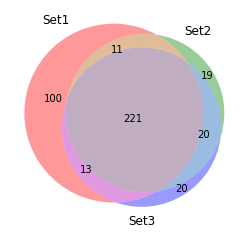

In [ ]:
https://github.com/konstantint/matplotlib-venn
from matplotlib_venn import venn3
venn3(subsets = (100, 19, 11, 20, 13, 20, 221), set_labels = ('Set1', 'Set2', 'Set3'))

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

NameError: ignored

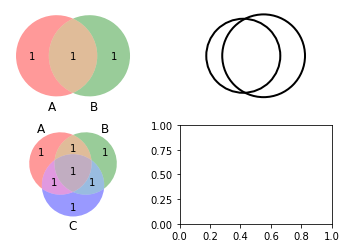

In [ ]:
import matplotlib.pyplot as plt

from matplotlib_venn import venn2, venn2_circles
figure, axes = plt.subplots(2, 2)
venn2(subsets={'10': 1, '01': 1, '11': 1}, set_labels = ('A', 'B'), ax=axes[0][0])
venn2_circles((1, 2, 3), ax=axes[0][1])
venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'), ax=axes[1][0])
venn3_circles({'001': 10, '100': 20, '010': 21, '110': 13, '011': 14}, ax=axes[1][1])
plt.show()

In [ ]:
def clear_subset(df_):
    inner_brackets = '[\(\[].*?[\)\]]'
    df_updated = df_.replace(to_replace =inner_brackets, value = '', regex = True) 
    return df_updated

clear_df = clear_subset(df)

Сравниваем

In [ ]:
!pip install lingpy

     |████████████████████████████████| 3.0MB 3.4MB/s 
     |████████████████████████████████| 1.7MB 33.9MB/s 
     |████████████████████████████████| 163kB 43.1MB/s 
     |████████████████████████████████| 194kB 45.0MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 286kB 40.6MB/s 
  Created wheel for lingpy: filename=lingpy-2.6.6-cp36-none-any.whl size=1263436 sha256=e20ae6f015f56a75e98bd00f4ba8e4b90a372570d52a6e9aa0749614e45c7ce3
  Stored in directory: /root/.cache/pip/wheels/d6/95/95/98f4bb29280d4602ee2032395b850c845bcc837e8cd6f9a6a8
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1527323 sha256=5b5a22c7b37f89babb425e5c0c78c2a12f537b67dccbff79e11180bb4dca8ac6
  Stored in directory: /root/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built lingpy networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0

In [ ]:
import lingpy as lp

2020-11-06 21:24:47,722 [INFO] Compiling diacritics and vowels...
2020-11-06 21:24:47,729 [INFO] Diacritics and sound classes were successfully compiled.
2020-11-06 21:24:47,732 [INFO] Compiling model <asjp>...
2020-11-06 21:24:47,736 [INFO] ('ǃ', '!')
2020-11-06 21:24:47,737 [INFO] ('ǂ', '!')
2020-11-06 21:24:47,739 [INFO] ('ǁ', '!')
2020-11-06 21:24:47,741 [INFO] ('ǀ', '!')
2020-11-06 21:24:47,743 [INFO] ('ʘ', '!')
2020-11-06 21:24:47,744 [INFO] ('gǃ', '!')
2020-11-06 21:24:47,746 [INFO] ('gǂ', '!')
2020-11-06 21:24:47,748 [INFO] ('gǁ', '!')
2020-11-06 21:24:47,752 [INFO] ('gǀ', '!')
2020-11-06 21:24:47,754 [INFO] ('gʘ', '!')
2020-11-06 21:24:47,755 [INFO] ('ǃŋ', '!')
2020-11-06 21:24:47,757 [INFO] ('ǂŋ', '!')
2020-11-06 21:24:47,758 [INFO] ('ǁŋ', '!')
2020-11-06 21:24:47,759 [INFO] ('ǀŋ', '!')
2020-11-06 21:24:47,762 [INFO] ('ʘŋ', '!')
2020-11-06 21:24:47,763 [INFO] ('!', '!')
2020-11-06 21:24:47,763 [INFO] ('|', '!')
2020-11-06 21:24:47,765 [INFO] ('g!', '!')
2020-11-06 21:24:47,76

# сравнение разных словарей

In [ ]:
!wget 'https://www.dropbox.com/s/fjsrdrei3393632/subset.%D1%81sv?dl=0' -O 'subset.csv'
!wget 'https://www.dropbox.com/s/5hfjc43fls4lkao/compar_3kurs.csv?dl=0' -O 'compar_3kurs.csv'
!wget 'https://www.dropbox.com/s/fwnqdxryloa0joc/kyakhtinsky_perekhval.csv?dl=0' -O 'kyakhtinsky_perekhval.csv'
!wget 'https://www.dropbox.com/s/04ypxf2gkt6yxog/liu_1984.csv?dl=0' -O 'liu_1984.csv'
!wget 'https://www.dropbox.com/s/5tl4ryajs2s5nfa/wikidata.csv?dl=0' -O 'wikidata.csv'

--2020-11-09 22:08:47--  https://www.dropbox.com/s/fjsrdrei3393632/subset.%D1%81sv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fjsrdrei3393632/subset.%D1%81sv [following]
--2020-11-09 22:08:47--  https://www.dropbox.com/s/raw/fjsrdrei3393632/subset.%D1%81sv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7985c2527db8ada443b3204a9d.dl.dropboxusercontent.com/cd/0/inline/BC7TvhaKRwh_MEBJnNP54qiGMkB6CHJxqf--wiN0tTfHZCgIevyGWY_tSrgee_vIafiLJ-ZoQwg1npbhDxbxX3WdLjPA4-NmAITUqtBAeuus6jhjK5mK588FVrSEuLE-bMg/file# [following]
--2020-11-09 22:08:47--  https://uc7985c2527db8ada443b3204a9d.dl.dropboxusercontent.com/cd/0/inline/BC7TvhaKRwh_MEBJnNP54qiGMkB6CHJxqf--wiN0tTfHZCgIevyGWY_tSrgee_vIafiLJ-ZoQwg1npbhDxbxX3WdLjPA4-NmAITU

In [ ]:
!wget 'https://www.dropbox.com/s/0p6pq57zlxs4wxr/temporary_takata.txt?dl=0' -O 'temp_takata.txt'

--2020-11-09 22:08:54--  https://www.dropbox.com/s/0p6pq57zlxs4wxr/temporary_takata.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0p6pq57zlxs4wxr/temporary_takata.txt [following]
--2020-11-09 22:08:54--  https://www.dropbox.com/s/raw/0p6pq57zlxs4wxr/temporary_takata.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4b33702cda314520b1848c8a50.dl.dropboxusercontent.com/cd/0/inline/BC5Im00C0Cla343HLfDUU2Wn0wiuh7RVftgPWWWXrpTBf58hXPG5fTdS2VH-F-BzNU96RwNZK7igHmPjRlOUOHaxgVWveoJdRxIy5dbktJZXLKyN61B-1OcX1S1COrNJwxQ/file# [following]
--2020-11-09 22:08:54--  https://uc4b33702cda314520b1848c8a50.dl.dropboxusercontent.com/cd/0/inline/BC5Im00C0Cla343HLfDUU2Wn0wiuh7RVftgPWWWXrpTBf58hXPG5fTdS2VH-F-BzNU96RwNZK7igHmPjRlOUO

In [ ]:
with open('temp_takata.txt', 'r', encoding='utf-8') as f:
    temp_takata = f.read().lower().split('\n')

In [ ]:
print(len(temp_takata))
temp_takata = set(temp_takata)
print(len(temp_takata))


4155
3722


In [ ]:
pidgin_takata = pd.read_csv('subset.csv', delimiter='\t')
compar_3kurs = pd.read_csv('compar_3kurs.csv', delimiter=';')
kyakhtinsky_perekhval = pd.read_csv('kyakhtinsky_perekhval.csv', delimiter=';')
liu_1984 = pd.read_csv('liu_1984.csv', delimiter=';')
wikidata = pd.read_csv('wikidata.csv', delimiter=',')

In [ ]:
textdistance.levenshtein.normalized_similarity('aaa', 'aab')

0.6666666666666667

In [ ]:
pidgin_takata.head()

,zh_id,zh_word,IPA_transcr,pinyin_IPA,ru_transcr,ru_translation,notes
0,A:02a-02 壹,哦定,γɤ-tiŋ,ó dìng,один,один,NaN
1,A:02a-02 貳,獨凹,tuə -va,dú āo,дува,два,NaN
2,A:02a-02 叄,的利,tiə -li,dí lì,дили,три,NaN
3,A:02a-02 肆,俏的利,ʨ‘iau-tiə -li,qiào dí lì,цяодили,четыре,NaN
4,A:02a-02 伍,癟地,pie-ti,biē dì,беди,пять,NaN


In [ ]:
#   inner_brackets = '[\(\[].*?[\)\]]'
#   df_updated = df_.replace(to_replace =inner_brackets, value = '', regex = True) 
pidgin_takata.ru_translation = pidgin_takata.ru_translation.replace(to_replace=r'[\[].*?[\]]', value='new', regex=True)
takata_rus = pidgin_takata.ru_translation.to_list()

In [ ]:
takata_rus_non_strict = takata_rus
strict = pidgin_takata.ru_translation.replace(to_replace=r'[\(\[].*?[\)\]]', value='new', regex=True)
takata_rus_strict_first = strict.to_list()
takata_rus_strict = []
for word in takata_rus_strict_first:
    if word[-4:] == ' new':
       new_word = word[:-4]
       takata_rus_strict.append(new_word)

In [ ]:
takata_rus_strict = set(takata_rus_strict)

In [ ]:
kyakhtinsky_perekhval.head()

,ru,pidgin,Unnamed: 2,Unnamed: 3
0,а,?,NaN,NaN
1,ага,ag?,NaN,NaN
2,баба,b?ba,NaN,NaN
3,бабушка,b?busik?,NaN,NaN
4,барышня,b?lasyn'a,NaN,NaN


In [ ]:
perekhval_ = kyakhtinsky_perekhval.ru.to_list()
perekhval = []
for p in perekhval_:
    p = p.lower()
    perekhval.append(p)
perekhval = set(perekhval)

In [ ]:
len(takata_rus_strict), len(perekhval), len(liu)

NameError: ignored

In [ ]:
liu_1984.head()

,word,pinyin_final,pinyin_1,origin,page,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,???,??rsh?n,a1er3shen2,аршин,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,??????,??rx?f?i,a1er3xi3fei1,альсифер,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,???,?f?l?n,a1fa3lin2,афалина,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,????,?li?m?t?,a1liu2mi3te4,алюмит,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,???,?yi'?r,a1yi'er3,аил,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
liu_ = liu_1984.origin.to_list()
liu = []
for l in liu_:
    l = l.lower()
    liu.append(l)
liu = set(liu)

In [ ]:
wikidata.head()

,id_,wiki_id,label_zh,label_ru,xinhua,country,type,levenstein_abs,levenstein_norm,jaccard
0,0,265997,伊曼德拉,Имандра,伊曼德拉,Russia,lake,0,0.000000,1.000000
1,1,166162,奥涅加,Онежское,奥涅日斯科耶,Russia,lake,4,0.666667,0.285714
2,2,233071,汉泰,Хантайское,汉泰斯科耶,Russia,lake,3,0.600000,0.400000
3,3,245763,奥特拉德诺耶,Отрадное,奥特拉德诺耶,Russia,lake,0,0.000000,1.000000
4,4,117036,绍托泽罗,Шотозеро,绍托泽罗,Russia,lake,0,0.000000,1.000000


In [ ]:
wiki_ = wikidata.label_ru.to_list()
wiki = []
for w in wiki_:
    w = w.lower()
    wiki.append(w)
wiki = set(wiki)

In [ ]:
wiki

In [ ]:
temp_takata

In [ ]:
len(temp_takata & perekhval), len(temp_takata & liu), len(perekhval & liu), len(liu & wiki), len(temp_takata & wiki), len(temp_takata & liu & perekhval)

(204, 18, 12, 14, 112, 7)

In [ ]:
liu & wiki

{'богатырь',
 'большевик',
 'долина',
 'думка',
 'коминтерн',
 'ливенка',
 'малиновка',
 'машина',
 'сарма',
 'сокол',
 'спартак',
 'тайга',
 'червонец',
 'чир'}

In [ ]:
!pip install matplotlib_venn

In [ ]:
import matplotlib_venn
help(matplotlib_venn)

Help on package matplotlib_venn:

NAME
    matplotlib_venn - Venn diagram plotting routines.

DESCRIPTION
    Copyright 2012, Konstantin Tretyakov.
    http://kt.era.ee/
    
    Licensed under MIT license.
    
    This package contains routines for plotting area-weighted two- and three-circle venn diagrams.
    There are four main functions here: :code:`venn2`, :code:`venn2_circles`, :code:`venn3`, :code:`venn3_circles`.
    
    The :code:`venn2` and :code:`venn2_circles`  accept as their only required argument a 3-element list of subset sizes:
    
        subsets = (Ab, aB, AB)
    
    That is, for example, subsets[0] contains the size of the subset (A and not B), and
    subsets[2] contains the size of the set (A and B), etc.
    
    Similarly, the functions :code:`venn3` and :code:`venn3_circles` require a 7-element list:
    
        subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC)
    
    The functions :code:`venn2_circles` and :code:`venn3_circles` simply draw two or three ci

In [ ]:
from matplotlib_venn import venn3
venn3(subsets = (100, 19, 11, 20, 13, 20, 221), set_labels = ('Set1', 'Set2', 'Set3'))

In [ ]:
len(temp_takata), len(perekhval), len(liu), len(wiki)

(3722, 588, 385, 26875)

In [ ]:
len(takata_rus_strict & perekhval), len(takata_rus_strict & liu), len(perekhval & liu)len(takata_rus_strict & liu & perekhval)

(10, 4, 12, 1)

In [ ]:
perekhval & liu

{'водка',
 'господин',
 'колхоз',
 'копейка',
 'машина',
 'печь',
 'рубль',
 'союз',
 'тайга',
 'халат',
 'хлеб',
 'хорошо'}

In [ ]:
takata_rus_strict & liu

{'господин', 'тик', 'товарищ', 'штоф'}

In [ ]:
takata_rus_strict & perekhval

{'господин',
 'дома',
 'коса',
 'лекарство',
 'мех',
 'по',
 'русский',
 'сопка',
 'хозяин',
 'шибко'}